In [2]:
import cv2
cv2.estimateAffinePartial2D??

Docstring:
estimateAffinePartial2D(from_, to[, inliers[, method[, ransacReprojThreshold[, maxIters[, confidence[, refineIters]]]]]]) -> retval, inliers
.   @brief Computes an optimal limited affine transformation with 4 degrees of freedom between
.   two 2D point sets.
.   
.   @param from First input 2D point set.
.   @param to Second input 2D point set.
.   @param inliers Output vector indicating which points are inliers.
.   @param method Robust method used to compute transformation. The following methods are possible:
.   -   @ref RANSAC - RANSAC-based robust method
.   -   @ref LMEDS - Least-Median robust method
.   RANSAC is the default method.
.   @param ransacReprojThreshold Maximum reprojection error in the RANSAC algorithm to consider
.   a point as an inlier. Applies only to RANSAC.
.   @param maxIters The maximum number of robust method iterations.
.   @param confidence Confidence level, between 0 and 1, for the estimated transformation. Anything
.   between 0.95 and 0.99 i

### 加载视频

In [1]:
# 加载视频
import cv2
import numpy as np

cap = cv2.VideoCapture('./video.mp4')

# 循环读取视频帧
while True:
    ret, frame = cap.read()
    if ret == True:
        cv2.imshow('video', frame)
        
    key = cv2.waitKey(30)
    # 用户按esc退出
    if key == 27:
        break
        
# 最后别忘了, 释放资源
cap.release()
cv2.destroyAllWindows()

### 去除背景示例


In [1]:
import cv2
import numpy as np

cap = cv2.VideoCapture(0)
# 创建mog对象
mog = cv2.bgsegm.createBackgroundSubtractorMOG()

while True:
    ret, frame = cap.read()
    if ret == True:
        fgmask = mog.apply(frame)
        cv2.imshow('video', fgmask)
        
    key = cv2.waitKey(1)
    # 用户按esc退出
    if key == 27:
        break
        
# 最后别忘了, 释放资源
cap.release()
cv2.destroyAllWindows()

### 形态学识别车辆


In [4]:
import cv2
import numpy as np

cap = cv2.VideoCapture('./video.mp4')

# 创建mog对象
mog = cv2.createBackgroundSubtractorMOG2()
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

min_w = 80
min_h = 75

line_high = 580
# 偏移量
offset = 7

cars = []
carno = 0

# 计算外接矩形的中心点
def center(x, y, w, h):
    x1 = int(w / 2)
    y1 = int(h / 2)
    cx = int(x) + x1
    cy = int(y) + y1
    return cx, cy

# 循环读取视频帧
while True:
    ret, frame = cap.read()
    if ret == True:
        # 把原始帧进行灰度化, 然后去噪
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        # 去噪
        blur = cv2.GaussianBlur(gray, (3, 3), 5)
        mask = mog.apply(blur)
        
        # 腐蚀
        erode = cv2.erode(mask, kernel)
        # 膨胀, 把图像还原回来
        dialte = cv2.dilate(erode, kernel, iterations=2)
        
        # 消除内部的小块
        # 闭运算.
        close = cv2.morphologyEx(dialte, cv2.MORPH_CLOSE, kernel)
        
        # 查找轮廓
        contours, h = cv2.findContours(close, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        
        # 画出检测线
        cv2.line(frame, (10, line_high), (1200, line_high), (255, 255, 0), 3)
        
        # 画出所有检测出来的轮廓
        for contour in contours:
            # 最大外接矩形
            (x, y, w, h) = cv2.boundingRect(contour)
            # 通过外接矩形的宽高大小来过滤掉小矩形.
            if w < min_w or h < min_h:
                continue
             
            # 能走到这里来的都是符合要求的矩形, 即正常的车.
            cv2.rectangle(frame, (int(x), int(y)), (int(x + w), int(y + h)), (0, 0, 255), 2)
            # 把车抽象为一点, 即外接矩形的中心点
            cpoint = center(x, y, w, h)
            cars.append(cpoint)
            cv2.circle(frame, (cpoint), 5, (0, 0, 255), -1)
            
            # 判断汽车是否过检测线
            for (x, y) in cars:
                if y > (line_high - offset) and y < (line_high + offset):
                    # 落入了有效区间，计数加1
                    carno += 1
                    cars.remove((x, y))
                    print(carno)

        cv2.putText(frame, 'Vehicle Count:' + str(carno), (500, 60), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 5)    
        cv2.imshow('frame', frame)
        
    key = cv2.waitKey(25)
    # 用户按esc退出
    if key == 27:
        break
        
# 最后别忘了, 释放资源
cap.release()
cv2.destroyAllWindows()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23


In [5]:
from sklearn.datasets import load_sample_image

In [6]:
china = load_sample_image('china.jpg')

In [7]:
import matplotlib.pyplot as plt

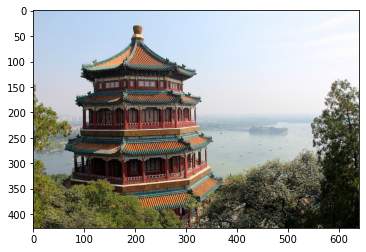

In [8]:
plt.imshow(china)

In [9]:
plt.imsave('china.jpg', china)

In [12]:
100 * 101 - 0.04 * (100 + 101)**2 

8483.96

## 查看背景消除效果对比原视频

In [10]:
import cv2

cap = cv2.VideoCapture('video.mp4')  					# 打开视频文件
backSub = cv2.createBackgroundSubtractorMOG2()			# 创建背景减除对象

# 后面将原视频和处理后的视频并排显示，由于单个视频尺寸太大，拼接后会超过窗口范围，故需要进行缩放
# 设置缩放比例，比如 0.5 表示缩小到原始大小的一半
scale_percent = 0.5										

while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    Mask = backSub.apply(frame)								# 应用背景减除算法  
    Mask_colored = cv2.cvtColor(Mask, cv2.COLOR_GRAY2BGR)	# 将前景掩码转换为三通道（彩色），以便与原始帧拼接
    combined_frame = cv2.hconcat([frame, Mask_colored])		# 水平拼接原始帧和前景检测帧    
    width = int(combined_frame.shape[1] * scale_percent)		# 获取拼接后图像的宽度和高度
    height = int(combined_frame.shape[0] * scale_percent)

    # 调整拼接后图像的大小，显示缩放后的拼接结果
    resized_combined_frame = cv2.resize(combined_frame, (width, height))
    cv2.imshow('Original and FG Mask', resized_combined_frame)

    # 按下 'q' 键退出
    if cv2.waitKey(30) & 0xFF == ord('q'):
        break

# 释放资源
cap.release()
cv2.destroyAllWindows()

## 代码优化

In [8]:
import cv2

cap = cv2.VideoCapture('video.mp4')  					# 打开视频文件
backSub = cv2.createBackgroundSubtractorMOG2()			# 创建背景减除对象
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
min_w,min_h  = 80,75

while True:
    ret, frame = cap.read()
    if ret == True:
        # 把原始帧进行灰度化, 然后去噪
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        blur = cv2.GaussianBlur(gray, (3, 3), 5)
        Mask = backSub.apply(blur)
        
        # 腐蚀
        erode = cv2.erode(Mask, kernel)
        # 膨胀, 多操作一次，把图像还原回来
        dialte = cv2.dilate(erode, kernel, iterations=2)
        # 闭运算整合破碎的小方块
        close = cv2.morphologyEx(dialte, cv2.MORPH_CLOSE, kernel)
        
        # 查找轮廓，返回轮廓点列表和层级信息
        contours, hierarchy = cv2.findContours(close, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        for contour in contours:
            # 最大外接矩形
            x, y, w, h = cv2.boundingRect(contour)
            if w < min_w or h < min_h:
                continue
            cv2.rectangle(frame, (int(x), int(y)), (int(x + w), int(y + h)), (0, 0, 255), 2)
        cv2.imshow('frame', frame)

    # 按下 'q' 键退出
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [13]:
import cv2
import numpy as np

cap = cv2.VideoCapture('./video.mp4')
mog = cv2.createBackgroundSubtractorMOG2(history=500, varThreshold=16, detectShadows=True)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

min_w = 80
min_h = 75
line_high = 580
offset = 7
cars = {}
carno = 0

def center(x, y, w, h):
    cx = int(x + w / 2)
    cy = int(y + h / 2)
    return cx, cy

while True:
    ret, frame = cap.read()
    if not ret:
        break
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (3, 3), 5)
    mask = mog.apply(blur)
    erode = cv2.erode(mask, kernel)
    dialte = cv2.dilate(erode, kernel, iterations=2)
    close = cv2.morphologyEx(dialte, cv2.MORPH_CLOSE, kernel)
    contours, _ = cv2.findContours(close, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    cv2.line(frame, (10, line_high), (1200, line_high), (255, 255, 0), 3)
    
    # 检测所有车辆
    for contour in contours:
        area = cv2.contourArea(contour)
        if area < 500:
            continue
        x, y, w, h = cv2.boundingRect(contour)
        if w < min_w or h < min_h:
            continue
        
        cpoint = center(x, y, w, h)
        
        # 给车辆生成唯一ID (可以根据其位置、大小等特征来生成简单的ID)
        car_id = str(x) + '_' + str(y) + '_' + str(w) + '_' + str(h)
        
        # 如果车辆ID第一次出现，记录它的中心点
        if car_id not in cars:
            cars[car_id] = (cpoint, cpoint)  # 第一个是当前帧，第二个是上一帧的中心点
        else:
            cars[car_id] = (cpoint, cars[car_id][0])  # 更新当前帧的中心点，并将上一帧的中心点保存

        # 画矩形和中心点
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 255), 2)
        cv2.circle(frame, cpoint, 5, (0, 0, 255), -1)

    # 检查车辆是否过线
    for car_id, (current_point, previous_point) in list(cars.items()):
        current_x, current_y = current_point
        previous_x, previous_y = previous_point

        # 检查车辆是否从上方到下方跨过了检测线
        if previous_y < line_high and current_y >= line_high:  # 上到下
            carno += 1
            print(f"Vehicle {car_id} crossed the line. Count: {carno}")
            # 车辆过线后从列表中删除，避免重复计数
            del cars[car_id]

    # 显示车辆计数
    cv2.putText(frame, 'Vehicle Count: ' + str(carno), (500, 60), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 5)
    cv2.imshow('frame', frame)

    # 等待按键退出
    if cv2.waitKey(10) == 27:
        break

cap.release()
cv2.destroyAllWindows()
